Matplotlib is python library used for making graphs. It is often used in conjunction with other commonly used python libraries, such as numpy and pandas. Plotting data is useful as a critical part of exploratory data analysis. It is a convenient way to visualize the distributions of certain features of a dataset or the relationships between features. Although you can just produce summary tables and calculate correlations, graphs are often more appealing to look at. Which is why in this tutorial, I will be going over the basics of how to use matplotlib including arguments, labels, and types of graphs.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

I will be going over how to use the pyplot module of the matplotlib library. plt is the standard alias used when importing. As said earlier, pandas is a library commonly used in conjunction with matplotlib since you often want to graph different features of a pandas dataframe. Seaborn is an alternative library used for plotting, but I am only importing it here because it comes with many premade datasets. Standard aliases for pandas and seaborn are pd and sns respectively. Let's start by getting some data to graph.

In [6]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


The palmer penguins dataframe has a few categorical variables along with a few quantitative ones. There are different graphs we can apply to each of these features individually as well as combinations of features. Let's start by making a simple histogram of bill length.

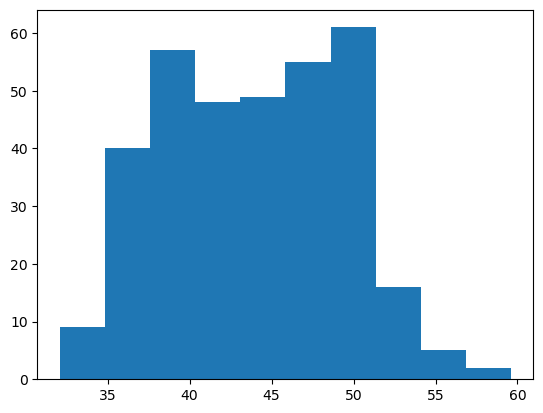

In [9]:
plt.hist(x = penguins['bill_length_mm'])
plt.savefig('bill_length_hist.jpg')
plt.show()

Matplotlib allows us to add extra features to our plots, such as axis labels, titles and subtitles, and more. These statements are included in between the initial creation of the plot and the command that shows the plot.

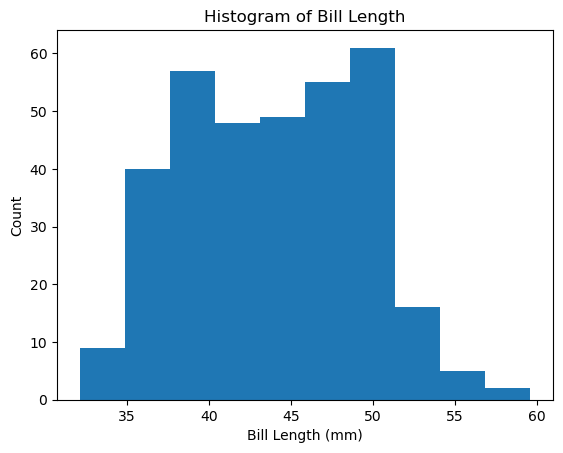

In [4]:
plt.hist(x = penguins['bill_length_mm'])
plt.xlabel('Bill Length (mm)')
plt.ylabel('Count')
plt.title('Histogram of Bill Length')
plt.savefig("bill_length_hist2.png")
plt.show()

We can also add additional arguments to the function that creates the histogram. We can change the bin size, color, and border of the bars. We can also show the proportion of penguins that fall within a certain interval rather than just the count. All of these arguments have default values that we are overriding below.

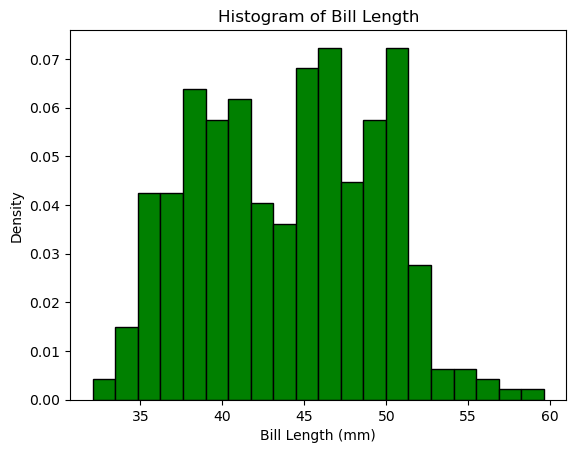

In [5]:
plt.hist(x = penguins['bill_length_mm'], bins = 20, density = True, color = "green", edgecolor = "black")
plt.xlabel('Bill Length (mm)')
plt.ylabel('Density')
plt.title('Histogram of Bill Length')
plt.savefig('bill_length_hist3.png')
plt.show()

A barplot is a good way to visualize the number of data points that fall within each category of a certain variable. For example, it makes since to view the number of penguins of each type of species with a barplot. With matplotlib, it's a bit tricky to do this since you first need to create an intermediate dataframe to hold the count of each species. Then you can plot each species type against its associated count.

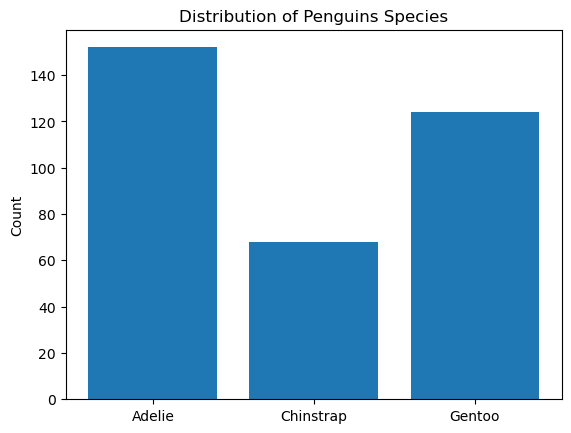

In [6]:
df = penguins.groupby('species').size()
plt.bar(x = df.index, height = df.values)
plt.ylabel('Count')
plt.title('Distribution of Penguins Species')
plt.savefig('species_bar.png')
plt.show()

We can also create graphs that visualize the relationship between 2 or more features of our dataset. For example, say we curious about the relationship between bill length and flipper length. We might intuitively believe that these variables are positively related somehow. The relationship between two quantitative variables can be visualized with a scatterplot.

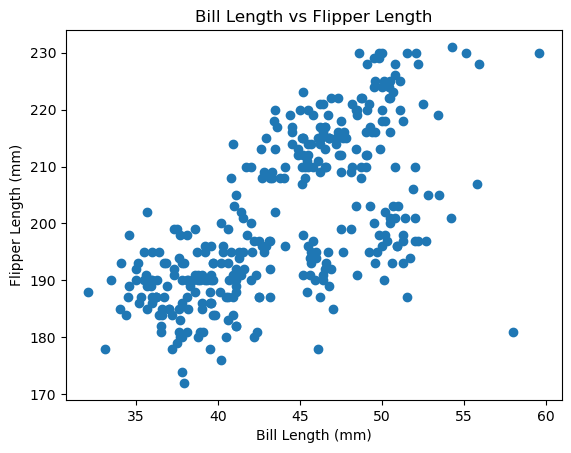

In [7]:
plt.scatter(x = penguins['bill_length_mm'], y = penguins['flipper_length_mm'])
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Bill Length vs Flipper Length')
plt.savefig('scatter.png')
plt.show()

From this graph, there seems to be a positive relationship between the two measurements. In addition, there appears to be 3 clusters of points. We can color the points by species to see if the 3 species types correspond to the 3 clusters shows. The code assigns a color to each species along with creating a legend for the new scatterplot.

In [10]:
species_colors = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'red'}
penguins['species_color'] = penguins['species'].map(species_colors)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in species_colors.values()]
labels = species_colors.keys()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_color
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,blue
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,blue
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,blue
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,blue
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,blue


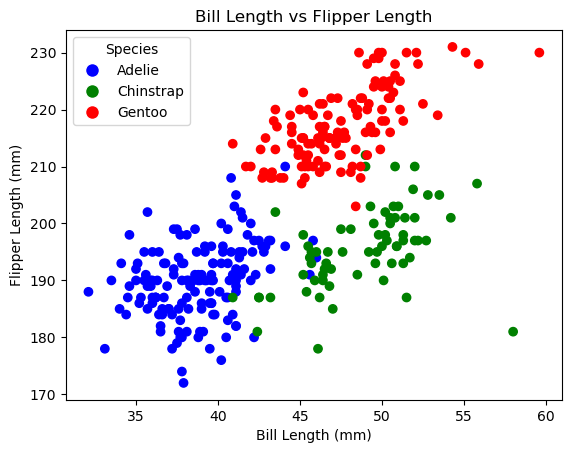

In [10]:
plt.scatter(x = penguins['bill_length_mm'], y = penguins['flipper_length_mm'], c = penguins['species_color'])
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Bill Length vs Flipper Length')
plt.legend(handles, labels, title='Species')
plt.savefig('scatter2.png')
plt.show()

As said earlier, seaborn is an alternative library that can be used for graphing. Functions from matplotlib can work in conjunction with graphs that are generated with seaborn. For example, in the code below, the scatterplot is created with a seaborn command, though the axis labels and title are created using matplotlib. Note that it is much easier to stratify the points by species with seaborn than it is with matplotlib. It's also worth pointing out that we are now specifying a data argument so that we can just pass in the names of columns as strings to the other arguments.

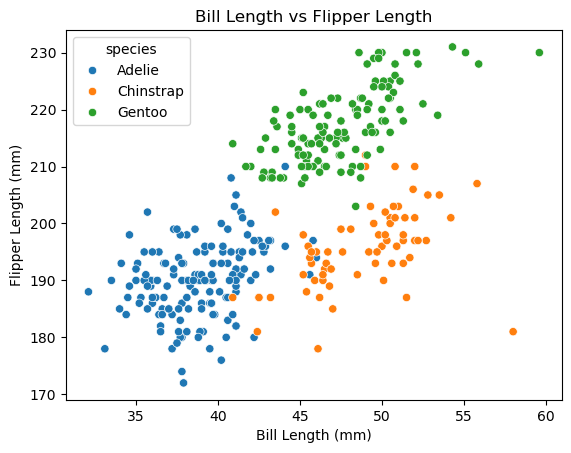

In [11]:
sns.scatterplot(data = penguins, x = 'bill_length_mm', y = 'flipper_length_mm', hue = 'species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Bill Length vs Flipper Length')
plt.savefig('scatter3.png')
plt.show()

In conclusion, matplotlib is a simple tool for graphing different features of a dataset. You can add more details to a plot by adding more lines in between the creation and displaying of the plot. The pyplot module comes with several different graph types to be used for different combinations of categorical and numerical features. For further learning, check out the pyplot documentation for additional arguments, graph details, and graph types. Also, check out seaborn and compare the two libraries and how they work.

https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

https://seaborn.pydata.org/api.html

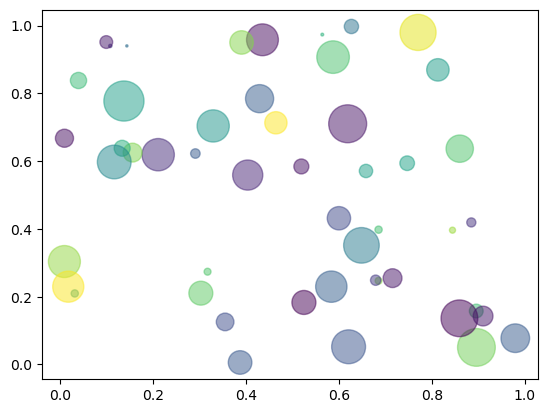

In [3]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.savefig('blog_image.png')
plt.show()

In [4]:
from tabulate import tabulate

In [7]:
df_head = penguins.head()

# Convert to markdown table format
markdown_table = tabulate(df_head, headers='keys', tablefmt='pipe')

# Save to a .md file
with open("df_head_table.md", "w") as file:
    file.write(markdown_table)

In [8]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
